In [1]:
# Run each cell in the jupyter notebook with shift-enter or control-enter in sequence.
# You should also read them to understand what they do.

def fib(n):
    """Slow, recursive version"""
    if n < 2: return 1
    return fib(n-1) + fib(n-2)

In [2]:
fib2_cache = {}

def fib2(n):
    """Memoize the recursion"""
    if n < 2: return 1
    if n in fib2_cache:
        return fib2_cache[n]
    ans = fib2(n-1) + fib2(n-2)
    fib2_cache[n] = ans
    return ans

In [3]:
# Alternatively, one can use a generic decorator to memoize the result
# of any function
import functools

def memoize(f):
    cache = {}
    @functools.wraps(f)
    def wrap(*args):
        if args not in cache:
            cache[args] = f(*args)  
        return cache[args]
    return wrap
        
@memoize
def fib2(n):
    """Same code as the recursive version -- but faster!"""
    if n < 2: return 1
    return fib2(n-1) + fib2(n-2)

In [4]:
import time
t=time.time()
print(fib(30))
print("Without memoization:", time.time()-t)
t=time.time()
print(fib2(30))
print("With memoization:", time.time()-t)

1346269
Without memoization: 0.3387947082519531
1346269
With memoization: 0.00015234947204589844


In [5]:
# Let's try a big number!
fib2(3000)
# (this should give a RecursionError)

RecursionError: maximum recursion depth exceeded

In [6]:
import sys
sys.setrecursionlimit(100000)
t=time.time()
fib2(3000)
print("Memoization, n=3,000:", time.time()-t)
# This should work!  If not, lower it to 1000.


Memoization, n=3,000: 0.010298967361450195


In [ ]:
# This probably doesn't, though:
fib2(50000)
# If you run this, you probably crash the kernel and need to
# rerun everything above this.  Then skip this next time!

In [7]:
# An alternative solution is iterative
# Better because python doesn't have much space on the stack
def fib3(n):
    """Bottom-up iterative solution"""
    if n == 0 or n==1:
        return 1
    
    fibs = [1, 1] + [0]*n
    for i in range(2, n+1):
            fibs[i] = fibs[i-1] + fibs[i-2]
    return fibs[n]

In [8]:
t=time.time()
fib3(3000)
print("Iteratively, n=3,000:", time.time()-t)
t=time.time()
fib3(50000)
print("Iteratively, n=50,000:", time.time()-t)


Iteratively, n=3,000: 0.003384113311767578
Iteratively, n=50,000: 0.11018705368041992


In [9]:
def fib4(n):
    """Sliding window version, improves space complexity"""
    if n < 2:
        return 1
    
    a1 = 1
    a2 = 1

    for i in range(2, n+1): 
        a1, a2 = a2, a1+a2
    return a2


In [10]:
t=time.time()
fib4(3000)
print("Sliding window, n=3,000:", time.time()-t)
t=time.time()
fib4(100000)
print("Sliding window, n=100,000:", time.time()-t)


Sliding window, n=3,000: 0.0021431446075439453
Sliding window, n=100,000: 0.16975092887878418


In [11]:
import numpy as np

def fib5(n):
    """Use matrix exponentiation to do it faster"""
    # Set dtype=object to use Python longs, so it doesn't overflow
    A = np.matrix([[1,1],[1,0]], dtype='object')
    v = (A**n).dot([[1],[0]])
    return v[0,0]

In [12]:
t=time.time()
fib5(100000)
print("Matrix, n=100,000:", time.time()-t)

Matrix, n=100,000: 0.026926517486572266


In [13]:
# Let's get a more reliable timing function for small values
# by repeating it a number of times

def gettime(func, n, min_time=0.1, _iterations=2):
    """Figure out how long func(n) takes to run.
    
    To make the timing reliable, run the function enough times
    to take min_time seconds overall
    """
    t1 = time.time()
    for i in range(_iterations):
        func(n)
    t2 = time.time()
    if t2 - t1 < min_time:
        return gettime(func, n, min_time, 2*_iterations)
    return (t2-t1)/_iterations
    

In [14]:
gettime(fib5, 100000)

0.006694406270980835

In [15]:
# Get all the data
def get_times(func, base, max_val=None, max_time=0.2, min_time=0.1):
    nums = []
    vals = []
    for i in range(1000):
        n = int(base**i)
        if nums and n == nums[-1]:
            continue
        if max_val and n > max_val:
            break
        t = gettime(func, n, min_time)
        nums.append(n)
        vals.append(t)
        if t > max_time:
            break
    return nums, vals

In [16]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

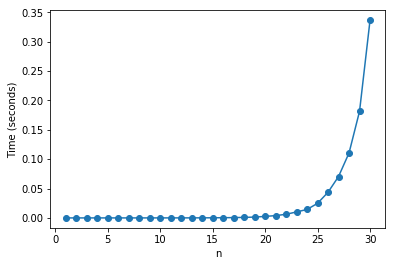

In [17]:
recursive = get_times(fib, 1.01)
plt.plot(*recursive, marker='o')
plt.ylabel("Time (seconds)")
plt.xlabel("n")

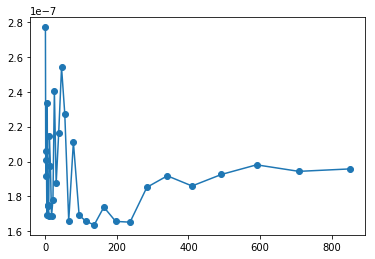

In [18]:
memoized = get_times(fib2, 1.2, max_val=1000)
plt.plot(*memoized, marker='o')
# Basically can't go large enough for reliable numbers

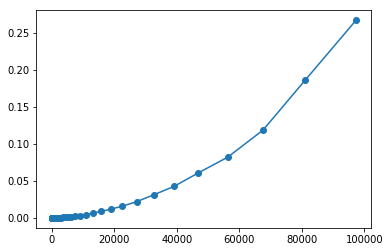

In [19]:
# All the following plots should give smooth curves;
# if they don't, try running a second time.  Random
# hiccups can happen, since we don't run the large
# values many times.  They also take a few seconds to
# run.

iterative = get_times(fib3, 1.2)
plt.plot(*iterative, marker='o')

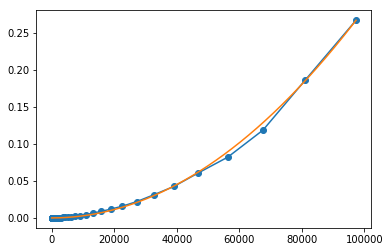

In [20]:
# Let's try overlaying a quadratic
def fit_curve(p, nums, times):
    xx = np.linspace(0, nums[-1], 1000)
    yy = times[-1] / xx[-1]**p * xx**p
    return xx, yy

plt.plot(*iterative, marker='o')
plt.plot(*fit_curve(2, *iterative))

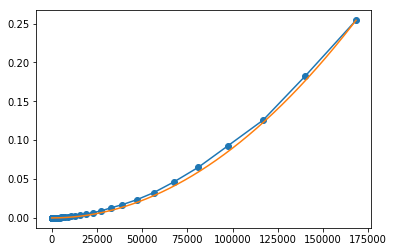

In [21]:
sliding = get_times(fib4, 1.2)
plt.plot(*sliding, marker='o')
plt.plot(*fit_curve(2, *sliding))

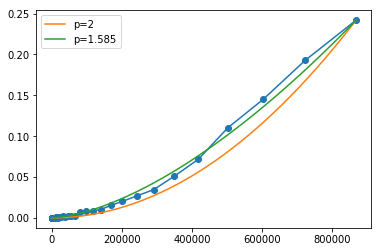

In [22]:
matrix = get_times(fib5, 1.2)
plt.plot(*matrix, marker='o')
# The quadratic doesn't fit well
plt.plot(*fit_curve(2, *matrix), label='p=2')
# The power is log_2 3 instead
plt.plot(*fit_curve(math.log(3)/math.log(2), *matrix), label='p=1.585')
plt.legend()

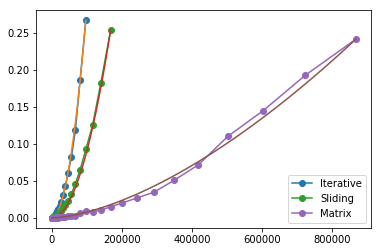

In [23]:
plt.plot(*iterative, marker='o', label='Iterative')
plt.plot(*fit_curve(2, *iterative))
plt.plot(*sliding, marker='o', label='Sliding')
plt.plot(*fit_curve(2, *sliding))
plt.plot(*matrix, marker='o', label='Matrix')
plt.plot(*fit_curve(math.log(3)/math.log(2), *matrix))
plt.legend()

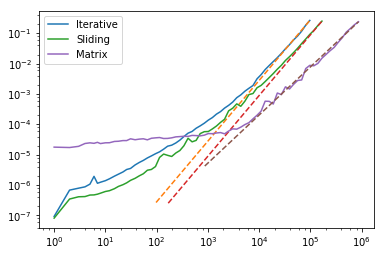

In [24]:
# On a log-log plot, n^p becomes a straight lines, and the slope gives the exponent.

plt.plot(*iterative, label='Iterative')
plt.plot(*fit_curve(2, *iterative), ls='--')
plt.plot(*sliding, label='Sliding')
plt.plot(*fit_curve(2, *sliding), ls='--')
plt.plot(*matrix, label='Matrix')
plt.loglog(*fit_curve(math.log(3)/math.log(2), *matrix), ls='--')
plt.legend()

In [25]:
# Let's use GMP rather than python long ints
# This requires the gmpy library,
# which is installable with `pip install gmpy`

import gmpy

def fib6(n):
    """Use matrix exponentiation to do it faster"""
    # Set dtype=object to use Python longs, so it doesn't overflow
    one = gmpy.mpz(1)
    A = np.matrix([[one,one],[one,one*0]], dtype='object')
    v = (A**n).dot([[1],[0]])
    return v[0,0]

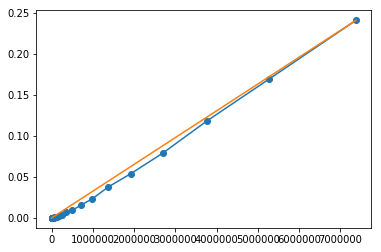

In [26]:
gmp_matrix = get_times(fib6, 1.4, max_time=0.2)
plt.plot(*gmp_matrix, marker='o')
# Let's compare to O(n) growth
plt.plot(*fit_curve(1, *gmp_matrix))


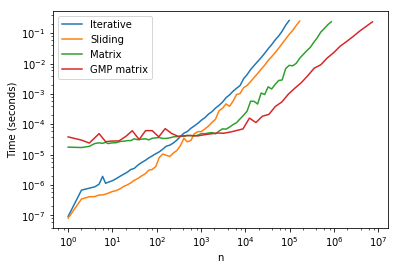

In [27]:
# How does it seem on a log log plot?
plt.plot(*iterative, label='Iterative')
#plt.plot(*fit_curve(2, *iterative), ls='--')
plt.plot(*sliding, label='Sliding')
#plt.plot(*fit_curve(2, *sliding), ls='--')
plt.plot(*matrix, label='Matrix')
#plt.plot(*fit_curve(math.log(3)/math.log(2), *matrix), ls='--')
plt.loglog(*gmp_matrix, label='GMP matrix')
plt.ylabel("Time (seconds)")
plt.xlabel("n")
plt.legend()


In [28]:
# Now the homework part of this problem set:
# Figure out what's going on in the log log plot above.
# For example, 

# (a) Why do they not appear to be straight lines the whole way?
# (b) What is the relation between the iterative and sliding window lines?
# (c) What do you think the shape of the sliding window line is,
#     and how would it extend for larger n?
# (d) What is the shape of the gmp curve, and how would it extend for larger n?  Why?
#     (you may find it useful to look at
#      https://gmplib.org/manual/Multiplication-Algorithms.html)